<a href="https://colab.research.google.com/github/Nyakiamo-Samuel/Estimation-of-Obesity-Levels-Based-on-Eating-Habits-and-Physical-Conditions/blob/main/Hubblemind_Internship_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading dependancies and the dataset

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set_theme(style='darkgrid')
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Importing the data
data=pd.read_csv(r"C:\\Users\\nyaki\\Udacity\\ObesityDataSet_raw_and_data_sinthetic.csv")
# Checking the first 5 rows of data with the larger values having dark green shade and vice versa
data.head().style.background_gradient(cmap="Greens")

In [ ]:
# Checking the last 5 rows of data with the larger values having dark green shade and vice versa
data.tail().style.background_gradient(cmap="Greens")

# Exploratory Data Analysis

In [ ]:
# Checking data shape
data.shape

(2111, 17)

In [ ]:
# Checking the column names
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
# Checking the number of unique values in the last column
data.iloc[:,16].nunique()

7

In [ ]:
# To check the unique values in the last column
data.iloc[:,16].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [ ]:
# Checking the number of unique values in the second-last column
data.iloc[:,15].nunique()

5

In [ ]:
# To check the unique values in the second-last column
data.iloc[:,15].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [ ]:
# Renamind the data columns
data_ = data.rename(columns={"FAVC":"Frequently_Consumed_High_Calorie_foods", "FCVC":"Frequency_of_consumption_of_ Vegetables", "NCP":"Number_of_main_meals_consumed_daily",
                     "CAEC":"Food_consumption_between_meals", "CH2O":"Daily_water_consumption", "SCC":"Monitoring_calorie_intake",
                     "FAF":"Frequency_of_physical_activity", "TUE":"Time_spent_using_technology_devices", "CALC":"Alcohol_consumption_daily",
                     "MTRANS":"Mode_of_transportation_used", "NObeyesdad":"Obesity_level"})
data_.head().style.background_gradient(cmap='Blues')

In [ ]:
# Checking for duplicates
data_.duplicated().value_counts()

False    2087
True       24
Name: count, dtype: int64

In [ ]:
# Droppingthe dupicates
data_.drop_duplicates(inplace=True)
data_.duplicated().value_counts()

False    2087
Name: count, dtype: int64

In [ ]:
data_.shape

(2087, 17)

In [ ]:
# Checking data information i.e non-null count and datatype
data_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Gender                                   2087 non-null   object 
 1   Age                                      2087 non-null   float64
 2   Height                                   2087 non-null   float64
 3   Weight                                   2087 non-null   float64
 4   family_history_with_overweight           2087 non-null   object 
 5   Frequently_Consumed_High_Calorie_foods   2087 non-null   object 
 6   Frequency_of_consumption_of_ Vegetables  2087 non-null   float64
 7   Number_of_main_meals_consumed_daily      2087 non-null   float64
 8   Food_consumption_between_meals           2087 non-null   object 
 9   SMOKE                                    2087 non-null   object 
 10  Daily_water_consumption                  2087 non-nul

In [ ]:
# Getting the statistical info from columnswith numeric values
data_.describe(include='all')

Gender          Age       Height       Weight  \
count    2087  2087.000000  2087.000000  2087.000000   
unique      2          NaN          NaN          NaN   
top      Male          NaN          NaN          NaN   
freq     1052          NaN          NaN          NaN   
mean      NaN    24.353090     1.702674    86.858730   
std       NaN     6.368801     0.093186    26.190847   
min       NaN    14.000000     1.450000    39.000000   
25%       NaN    19.915937     1.630178    66.000000   
50%       NaN    22.847618     1.701584    83.101100   
75%       NaN    26.000000     1.769491   108.015907   
max       NaN    61.000000     1.980000   173.000000   

       family_history_with_overweight Frequently_Consumed_High_Calorie_foods  \
count                            2087                                   2087   
unique                              2                                      2   
top                               yes                                    yes   
freq                             1722                                   1844   
mean                              NaN                                    NaN   
std                               NaN                                    NaN   
min                               NaN                                    NaN   
25%                               NaN                                    NaN   
50%                               NaN                                    NaN   
75%                               NaN                                    NaN   
max                               NaN                                    NaN   

        Frequency_of_consumption_of_ Vegetables  \
count                               2087.000000   
unique                                      NaN   
top                                         NaN   
freq                                        NaN   
mean                                   2.421466   
std                                    0.534737   
min                                    1.000000   
25%                                    2.000000   
50%                                    2.396265   
75%                                    3.000000   
max                                    3.000000   

        Number_of_main_meals_consumed_daily Food_consumption_between_meals  \
count                           2087.000000                           2087   
unique                                  NaN                              4   
top                                     NaN                      Sometimes   
freq                                    NaN                           1761   
mean                               2.701179                            NaN   
std                                0.764614                            NaN   
min                                1.000000                            NaN   
25%                                2.697467                            NaN   
50%                                3.000000                            NaN   
75%                                3.000000                            NaN   
max                                4.000000                            NaN   

       SMOKE  Daily_water_consumption Monitoring_calorie_intake  \
count   2087              2087.000000                      2087   
unique     2                      NaN                         2   
top       no                      NaN                        no   
freq    2043                      NaN                      1991   
mean     NaN                 2.004749                       NaN   
std      NaN                 0.608284                       NaN   
min      NaN                 1.000000                       NaN   
25%      NaN                 1.590922                       NaN   
50%      NaN                 2.000000                       NaN   
75%      NaN                 2.466193                       NaN   
max      NaN                 3.000000                       NaN   

        Frequency_

In [ ]:
# checking for total null values
data_.isnull().sum()

Gender                                     0
Age                                        0
Height                                     0
Weight                                     0
family_history_with_overweight             0
Frequently_Consumed_High_Calorie_foods     0
Frequency_of_consumption_of_ Vegetables    0
Number_of_main_meals_consumed_daily        0
Food_consumption_between_meals             0
SMOKE                                      0
Daily_water_consumption                    0
Monitoring_calorie_intake                  0
Frequency_of_physical_activity             0
Time_spent_using_technology_devices        0
Alcohol_consumption_daily                  0
Mode_of_transportation_used                0
Obesity_level                              0
dtype: int64

In [ ]:
# copying data
obesity=data_.copy()
obesity

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     Frequently_Consumed_High_Calorie_foods  \
0                                        no   
1                                        no   
2                                        no   
3                                        no   
4                                        no   
...                                     ...   
2106                                    yes   
2107                                    yes   
2108                                    yes   
2109                                    yes   
2110                                    yes   

      Frequency_of_consumption_of_ Vegetables  \
0                                         2.0   
1                                         3.0   
2                                         2.0   
3                                         3.0   
4                                         2.0   
...                                       ...   
2106                                      3.0   
2107                                      3.0   
2108                                      3.0   
2109                                      3.0   
2110                                      3.0   

      Number_of_main_meals_consumed_daily Food_consumption_between_meals  \
0                                     3.0                      Sometimes   
1                                     3.0                      Sometimes   
2                                     3.0                      Sometimes   
3                                     3.0                      Sometimes   
4                                     1.0                      Sometimes   
...                                   ...                            ...   
2106                                  3.0                      Sometimes   
2107                                  3.0                      Sometimes   
2108                                  3.0                      Sometimes   
2109                                  3.0                      Sometimes   
2110                                  3.0                      Sometimes   

     SMOKE  Daily_water_consumption Monitoring_calorie_intake  \
0       no                 2.000000                        no   
1      yes                 3.000000                       yes   
2       no                 2.000000                        no   
3       no                 2.000000                        no   
4       no                 2.000000                        no   
...    ...                      ...                       ...   
2106    no                 1.728139                        no   
2107    no                 2.005130                        no   
2108    no                 2.054193                        no   
2109    no                 2.852339                        no   
2110    no                 2.863513                        no   

      Frequency_of_physical_activity  Time_spent_using_technology_devices  \
0                           0.000000                             1.000000   
1                           3.000000       

In [ ]:
# Checking copied data information i.e non-null count and datatype
obesity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Gender                                   2087 non-null   object 
 1   Age                                      2087 non-null   float64
 2   Height                                   2087 non-null   float64
 3   Weight                                   2087 non-null   float64
 4   family_history_with_overweight           2087 non-null   object 
 5   Frequently_Consumed_High_Calorie_foods   2087 non-null   object 
 6   Frequency_of_consumption_of_ Vegetables  2087 non-null   float64
 7   Number_of_main_meals_consumed_daily      2087 non-null   float64
 8   Food_consumption_between_meals           2087 non-null   object 
 9   SMOKE                                    2087 non-null   object 
 10  Daily_water_consumption                  2087 non-nul

In [ ]:
# import the preprocessing libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
scale=MinMaxScaler()
label=LabelEncoder()
standard=StandardScaler()
encoder=OneHotEncoder(sparse_output=False)

In [ ]:
# Preprocessing the copied data values
obesity['Gender']=label.fit_transform(obesity['Gender'])
obesity['Age']=scale.fit_transform(obesity[['Age']])
obesity['Weight']=scale.fit_transform(obesity[['Weight']])
obesity['Height']=scale.fit_transform(obesity[["Height"]])
obesity['family_history_with_overweight']=label.fit_transform(obesity['family_history_with_overweight'])
obesity['Frequently_Consumed_High_Calorie_foods']=label.fit_transform(obesity['Frequently_Consumed_High_Calorie_foods'])
obesity['Frequency_of_consumption_of_ Vegetables']=scale.fit_transform(obesity[['Frequency_of_consumption_of_ Vegetables']])
obesity['Number_of_main_meals_consumed_daily']=scale.fit_transform(obesity[['Number_of_main_meals_consumed_daily']])
obesity['Food_consumption_between_meals']=label.fit_transform(obesity['Food_consumption_between_meals'])
obesity['SMOKE']=label.fit_transform(obesity['SMOKE'])
obesity['Daily_water_consumption']=scale.fit_transform(obesity[['Daily_water_consumption']])
obesity['Monitoring_calorie_intake']=label.fit_transform(obesity['Monitoring_calorie_intake'])
obesity['Frequency_of_physical_activity']=scale.fit_transform(obesity[['Frequency_of_physical_activity']])
obesity['Time_spent_using_technology_devices']=scale.fit_transform(obesity[['Time_spent_using_technology_devices']])
obesity['Alcohol_consumption_daily']=label.fit_transform(obesity['Alcohol_consumption_daily'])


In [ ]:
obesity[['Age','Weight','Height']].describe()

Age       Weight       Height
count  2087.000000  2087.000000  2087.000000
mean      0.220279     0.357155     0.476744
std       0.135506     0.195454     0.175823
min       0.000000     0.000000     0.000000
25%       0.125871     0.201493     0.339959
50%       0.188247     0.329113     0.474687
75%       0.255319     0.515044     0.602814
max       1.000000     1.000000     1.000000

In [ ]:
# Creating the train
train=obesity.iloc[:,:15]
train

Gender       Age    Height    Weight  family_history_with_overweight  \
0          0  0.148936  0.320755  0.186567                               1   
1          0  0.148936  0.132075  0.126866                               1   
2          1  0.191489  0.660377  0.283582                               1   
3          1  0.276596  0.660377  0.358209                               0   
4          1  0.170213  0.622642  0.379104                               0   
...      ...       ...       ...       ...                             ...   
2106       0  0.148443  0.491943  0.689616                               1   
2107       0  0.169850  0.563366  0.707037                               1   
2108       0  0.181362  0.570200  0.706637                               1   
2109       0  0.220467  0.546132  0.704079                               1   
2110       0  0.205632  0.544974  0.705020                               1   

      Frequently_Consumed_High_Calorie_foods  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
2106                                       1   
2107                                       1   
2108                                       1   
2109                                       1   
2110                                       1   

      Frequency_of_consumption_of_ Vegetables  \
0                                         0.5   
1                                         1.0   
2                                         0.5   
3                                         1.0   
4                                         0.5   
...                                       ...   
2106                                      1.0   
2107                                      1.0   
2108                                      1.0   
2109                                      1.0   
2110                                      1.0   

      Number_of_main_meals_consumed_daily  Food_consumption_between_meals  \
0                                0.666667                               2   
1                                0.666667                               2   
2                                0.666667                               2   
3                                0.666667                               2   
4                                0.000000                               2   
...                                   ...                             ...   
2106                             0.666667                               2   
2107                             0.666667                               2   
2108                             0.666667                               2   
2109                             0.666667                               2   
2110                             0.666667                               2   

      SMOKE  Daily_water_consumption  Monitoring_calorie_intake  \
0         0                 0.500000                          0   
1         1                 1.000000                          1   
2         0                 0.500000                          0   
3         0                 0.500000                          0   
4         0                 0.500000                          0   
...     ...                      ...                        ...   
2106      0                 0.364070                          0   
2107      0                 0.502565                          0   
2108      0                 0.527097                          0   
2109      0                 0.926170                          0   
2110      0                 0.931757                          0   

      Frequency_of_physical_activity  Time_spent_using_technology_devices  \
0                           0.000000                             0.500000   
1                  

In [ ]:
# Getting dummies for the Mode_of_transportation_used column
#dummies_tra = pd.get_dummies(obesity['Mode_of_transportation_used'])
#dummies_tra.head()

In [ ]:
# One-Hot encoding Mode_of_transportation_used
obesity['Mode_of_transportation_used']=encoder.fit_transform(obesity[['Mode_of_transportation_used']])
obesity['Mode_of_transportation_used']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2106    0.0
2107    0.0
2108    0.0
2109    0.0
2110    0.0
Name: Mode_of_transportation_used, Length: 2087, dtype: float64

In [ ]:
# concatinating the dummies to the train
train=pd.concat([train, obesity['Mode_of_transportation_used']], axis='columns')
train.head()

Gender       Age    Height    Weight  family_history_with_overweight  \
0       0  0.148936  0.320755  0.186567                               1   
1       0  0.148936  0.132075  0.126866                               1   
2       1  0.191489  0.660377  0.283582                               1   
3       1  0.276596  0.660377  0.358209                               0   
4       1  0.170213  0.622642  0.379104                               0   

   Frequently_Consumed_High_Calorie_foods  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Frequency_of_consumption_of_ Vegetables  \
0                                      0.5   
1                                      1.0   
2                                      0.5   
3                                      1.0   
4                                      0.5   

   Number_of_main_meals_consumed_daily  Food_consumption_between_meals  SMOKE  \
0                             0.666667                               2      0   
1                             0.666667                               2      1   
2                             0.666667                               2      0   
3                             0.666667                               2      0   
4                             0.000000                               2      0   

   Daily_water_consumption  Monitoring_calorie_intake  \
0                      0.5                          0   
1                      1.0                          1   
2                      0.5                          0   
3                      0.5                          0   
4                      0.5                          0   

   Frequency_of_physical_activity  Time_spent_using_technology_devices  \
0                        0.000000                                  0.5   
1                        1.000000                                  0.0   
2                        0.666667                                  0.5   
3                        0.666667                                  0.0   
4                        0.000000                                  0.0   

   Alcohol_consumption_daily  Mode_of_transportation_used  
0                          3                          0.0  
1                          2                          0.0  
2                          1                          0.0  
3                          1                          0.0  
4                          2                          0.0

In [ ]:
# Grtting dummies for the Obesity_level column
#dummies_obesity_level = pd.get_dummies(obesity['Obesity_level'])
#dummies_obesity_level

In [ ]:
# listing the columns in the train data
col_train=list(train.columns)
col_train

['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'Frequently_Consumed_High_Calorie_foods',
 'Frequency_of_consumption_of_ Vegetables',
 'Number_of_main_meals_consumed_daily',
 'Food_consumption_between_meals',
 'SMOKE',
 'Daily_water_consumption',
 'Monitoring_calorie_intake',
 'Frequency_of_physical_activity',
 'Time_spent_using_technology_devices',
 'Alcohol_consumption_daily',
 'Mode_of_transportation_used']

In [ ]:
# listing the weight of the values in the test data
test_names=list(data_["Obesity_level"].unique())
test_names

['Normal_Weight',
 'Overweight_Level_I',
 'Overweight_Level_II',
 'Obesity_Type_I',
 'Insufficient_Weight',
 'Obesity_Type_II',
 'Obesity_Type_III']

In [ ]:
# Getting dummies for the Obesity_level column
#obesity_dummies=pd.get_dummies(obesity["Obesity_level"])
#obesity_dummies

In [ ]:
# One-Hot encoding the Obesity_level column
obesity['Obesity_level']=encoder.fit_transform(obesity[['Obesity_level']])
obesity['Obesity_level']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2106    0.0
2107    0.0
2108    0.0
2109    0.0
2110    0.0
Name: Obesity_level, Length: 2087, dtype: float64

In [ ]:
# Getting the test data
test=obesity["Obesity_level"]
test

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2106    0.0
2107    0.0
2108    0.0
2109    0.0
2110    0.0
Name: Obesity_level, Length: 2087, dtype: float64

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train, test, train_size=0.8, random_state=42)

In [ ]:
# Importing the RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Fitting the train and test to the model
random.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# X_test prediction
random_prediction=random.predict(X_test)
random_prediction

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.

In [ ]:
# Finding the accuracy, precision,recalla dn f1 scores of the RandomForestClassifier
from sklearn.metrics import *
print('Accuracy: {0} \nPrecision: {1} \nRecall: {2} \nF1-Score: {3}'.format(accuracy_score(Y_test, random_prediction), precision_score(Y_test, random_prediction),
                                                                            recall_score(Y_test, random_prediction), f1_score(Y_test, random_prediction)))

Accuracy: 0.9904306220095693 
Precision: 0.9824561403508771 
Recall: 0.9491525423728814 
F1-Score: 0.9655172413793103


In [ ]:
print(classification_report(Y_test, random_prediction))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       359
         1.0       0.98      0.95      0.97        59

    accuracy                           0.99       418
   macro avg       0.99      0.97      0.98       418
weighted avg       0.99      0.99      0.99       418



In [ ]:
# Importing the Logistic Regression model
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()

In [ ]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(train, test, train_size=0.8)

In [ ]:
# Fitting the train and test to the model
logistic.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# x_test prediction
logistic_predict=linear.predict(x_test)
logistic_predict

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
# Finding the accuracy, precision,recalla dn f1 scores of the Logistic Regression
print('Accuracy: {0} \nPrecision: {1} \nRecall: {2} \nF1-Score: {3}'.format(accuracy_score(y_test, linear_predict), precision_score(y_test, linear_predict), recall_score(y_test, linear_predict), f1_score(y_test, linear_predict)))

Accuracy: 0.9593301435406698 
Precision: 0.8043478260869565 
Recall: 0.8222222222222222 
F1-Score: 0.8131868131868132


In [ ]:
print(classification_report(y_test, linear_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       373
         1.0       0.80      0.82      0.81        45

    accuracy                           0.96       418
   macro avg       0.89      0.90      0.90       418
weighted avg       0.96      0.96      0.96       418



[[358   1]
 [  3  56]]


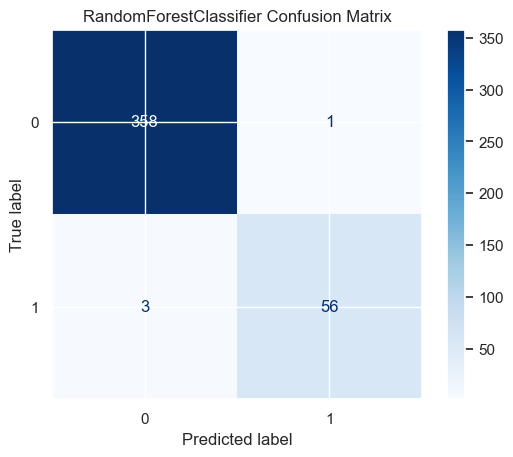

In [ ]:
# Creating the confusion matrix for the RandomForestClassifier
con_mat=confusion_matrix(Y_test, random_prediction)
print(con_mat)
# Creating the confusion matrix visual display
vis_con_mat=ConfusionMatrixDisplay(confusion_matrix=con_mat)
vis_con_mat.plot(cmap='Blues')
plt.title('RandomForestClassifier Confusion Matrix')
# Saving the figure
plt.savefig('RandomForestClassifier Confusion Matrix.jpg', dpi=500)
plt.show()

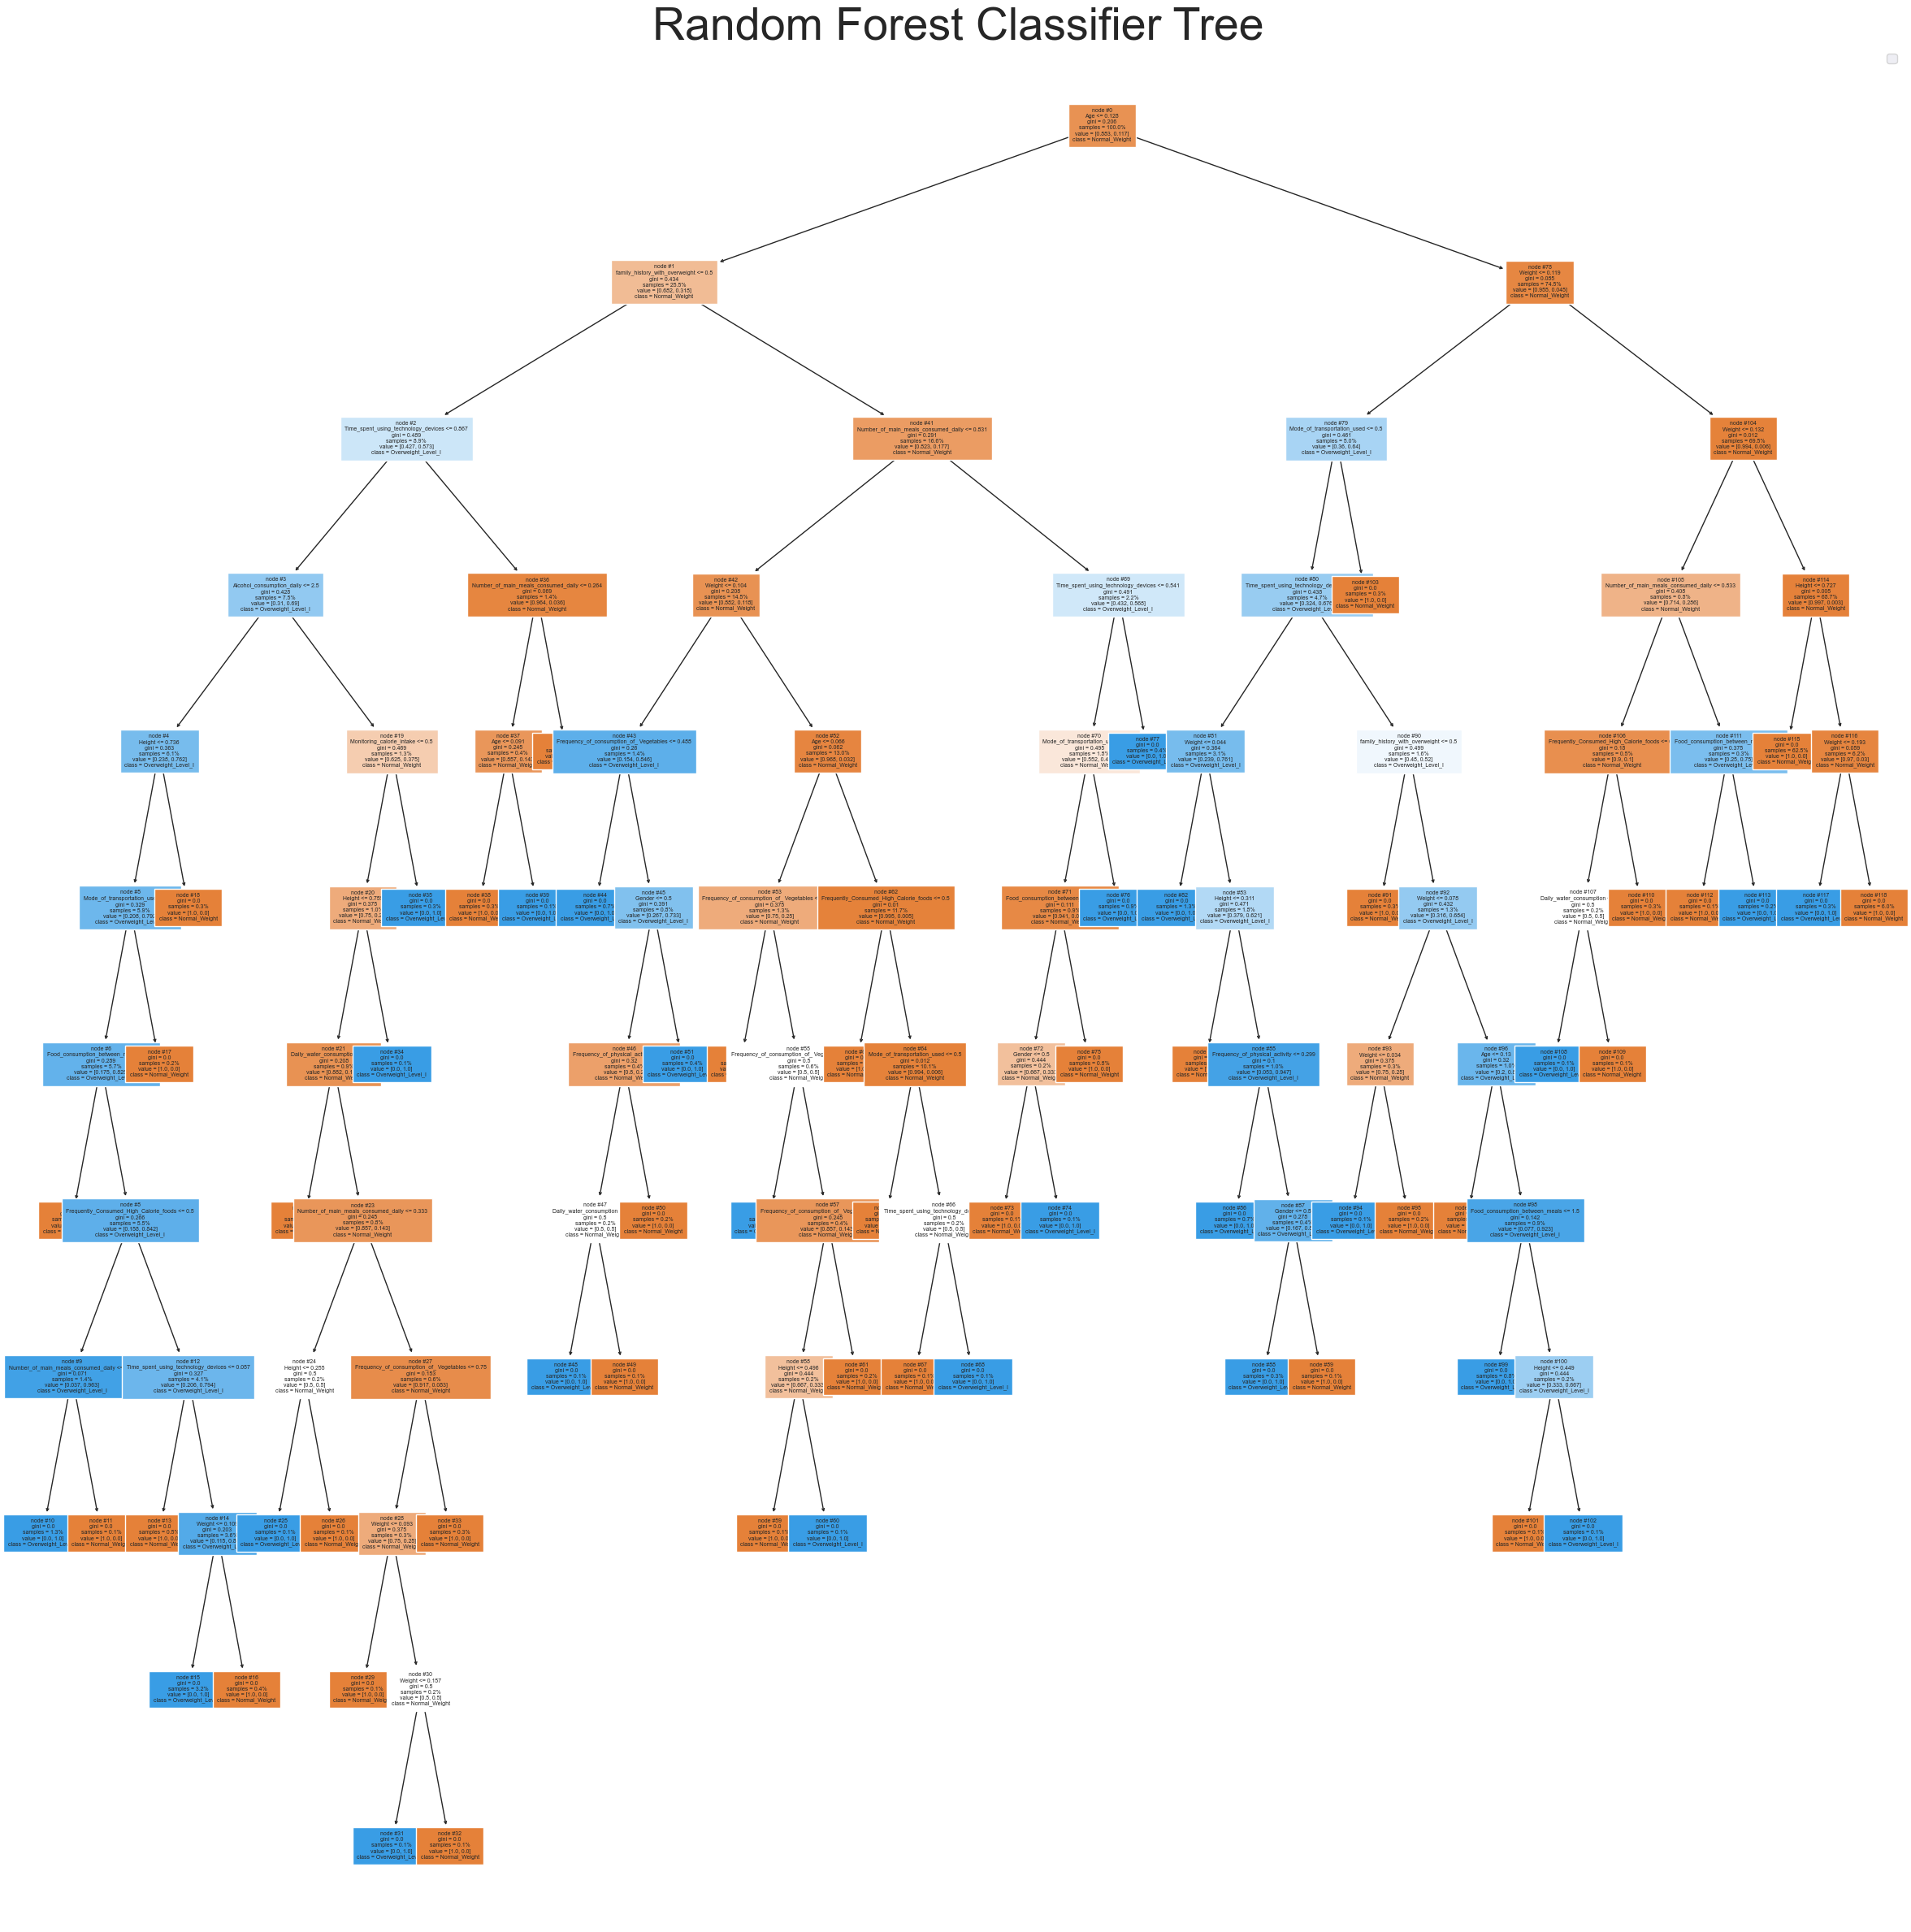

In [ ]:
# Importing plot_tree
from sklearn.tree import plot_tree

# Plotting the Random Forest Classifier tree
plt.figure(figsize=(30,30))
plot_tree(random.estimators_[0], feature_names=col_train, class_names=test_names, filled=True, fontsize=5, node_ids=True, proportion=True)
plt.title('Random Forest Classifier Tree', fontsize=40)
# Saving the image
plt.savefig('Random Forest Classifier Tree.jpg', dpi=700)
plt.show()

[[364   9]
 [  8  37]]


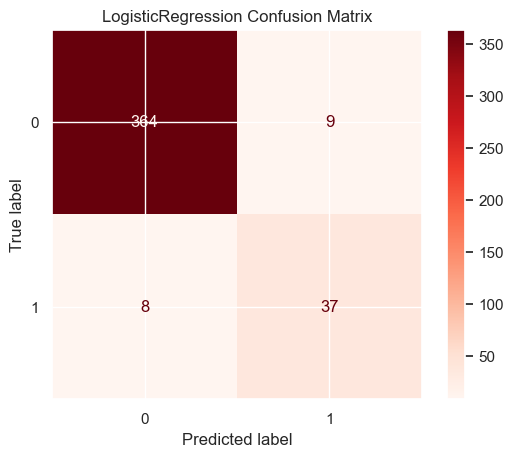

In [ ]:
# Creating the confusion matrix for tje logistic regression
con_mat=confusion_matrix(y_test, linear_predict)
print(con_mat)
# Creating the confusion matrix visual display
vis_con_mat=ConfusionMatrixDisplay(confusion_matrix=con_mat)
vis_con_mat.plot(cmap='Reds')
plt.title('LogisticRegression Confusion Matrix')
# Saving the image
plt.savefig('LogisticRegression Confusion Matrix.jpg', dpi=500)
plt.show()

# Outlier detection and handling

In [ ]:
data_

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     Frequently_Consumed_High_Calorie_foods  \
0                                        no   
1                                        no   
2                                        no   
3                                        no   
4                                        no   
...                                     ...   
2106                                    yes   
2107                                    yes   
2108                                    yes   
2109                                    yes   
2110                                    yes   

      Frequency_of_consumption_of_ Vegetables  \
0                                         2.0   
1                                         3.0   
2                                         2.0   
3                                         3.0   
4                                         2.0   
...                                       ...   
2106                                      3.0   
2107                                      3.0   
2108                                      3.0   
2109                                      3.0   
2110                                      3.0   

      Number_of_main_meals_consumed_daily Food_consumption_between_meals  \
0                                     3.0                      Sometimes   
1                                     3.0                      Sometimes   
2                                     3.0                      Sometimes   
3                                     3.0                      Sometimes   
4                                     1.0                      Sometimes   
...                                   ...                            ...   
2106                                  3.0                      Sometimes   
2107                                  3.0                      Sometimes   
2108                                  3.0                      Sometimes   
2109                                  3.0                      Sometimes   
2110                                  3.0                      Sometimes   

     SMOKE  Daily_water_consumption Monitoring_calorie_intake  \
0       no                 2.000000                        no   
1      yes                 3.000000                       yes   
2       no                 2.000000                        no   
3       no                 2.000000                        no   
4       no                 2.000000                        no   
...    ...                      ...                       ...   
2106    no                 1.728139                        no   
2107    no                 2.005130                        no   
2108    no                 2.054193                        no   
2109    no                 2.852339                        no   
2110    no                 2.863513                        no   

      Frequency_of_physical_activity  Time_spent_using_technology_devices  \
0                           0.000000                             1.000000   
1                           3.000000       

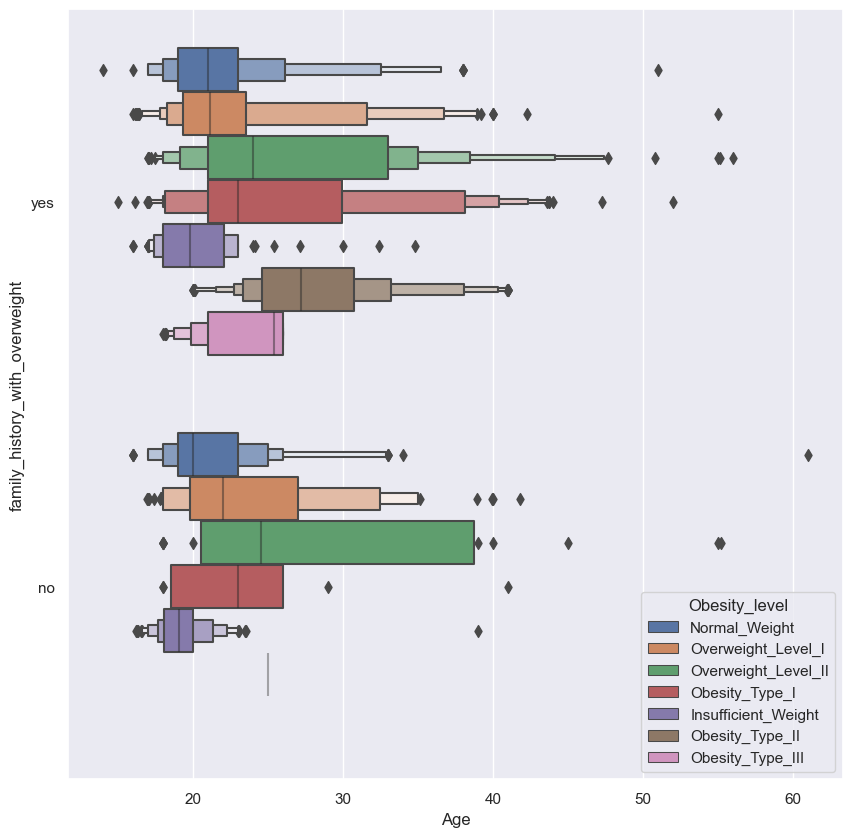

In [ ]:
plt.figure(figsize=(10,10))
sb.boxenplot(data=data_, x='Age', y='family_history_with_overweight', hue='Obesity_level')
plt.show()

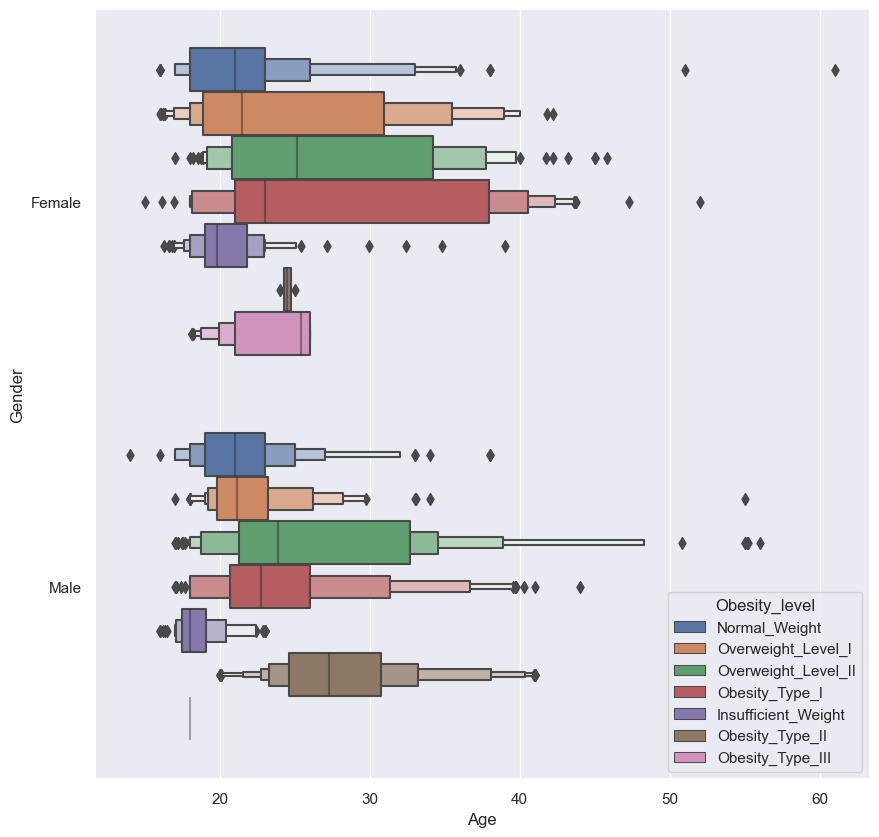

In [ ]:
plt.figure(figsize=(10,10))
sb.boxenplot(data=data_, x='Age', hue='Obesity_level', y='Gender')
plt.show()

<Figure size 1000x1000 with 0 Axes>

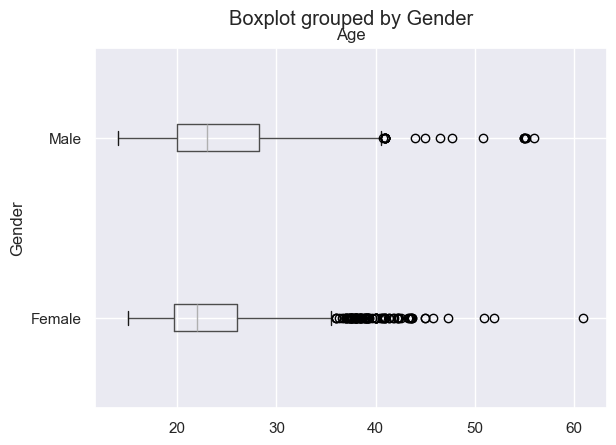

In [ ]:
plt.figure(figsize=(10,10))
data_.boxplot(by='Gender', column='Age', vert=False)
plt.show()

<Figure size 1000x1000 with 0 Axes>

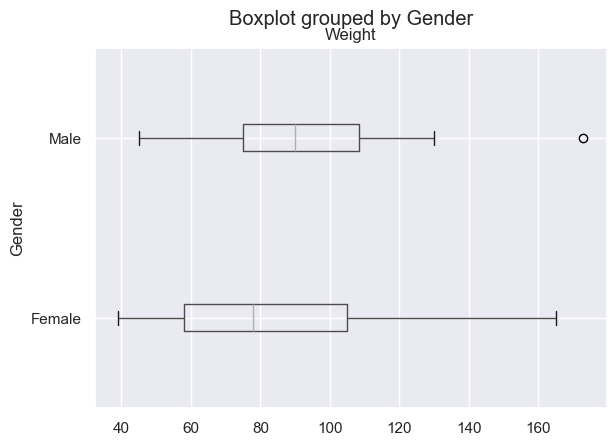

In [ ]:
plt.figure(figsize=(10,10))
data_.boxplot(by='Gender', column='Weight', vert=False)
plt.show()

<Figure size 1000x1000 with 0 Axes>

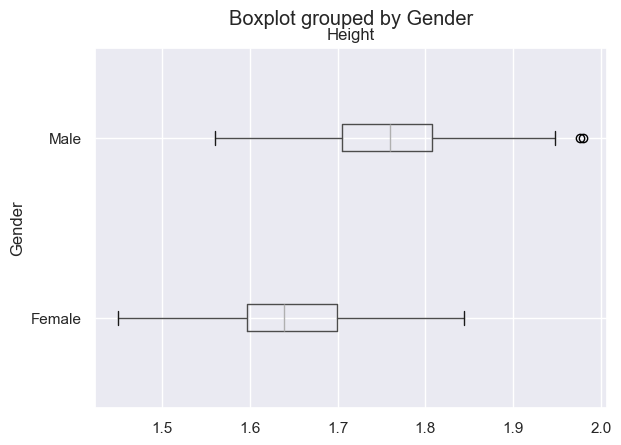

In [ ]:
plt.figure(figsize=(10,10))
data_.boxplot(by='Gender', column='Height', vert=False)
plt.show()

In [ ]:
data_

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     Frequently_Consumed_High_Calorie_foods  \
0                                        no   
1                                        no   
2                                        no   
3                                        no   
4                                        no   
...                                     ...   
2106                                    yes   
2107                                    yes   
2108                                    yes   
2109                                    yes   
2110                                    yes   

      Frequency_of_consumption_of_ Vegetables  \
0                                         2.0   
1                                         3.0   
2                                         2.0   
3                                         3.0   
4                                         2.0   
...                                       ...   
2106                                      3.0   
2107                                      3.0   
2108                                      3.0   
2109                                      3.0   
2110                                      3.0   

      Number_of_main_meals_consumed_daily Food_consumption_between_meals  \
0                                     3.0                      Sometimes   
1                                     3.0                      Sometimes   
2                                     3.0                      Sometimes   
3                                     3.0                      Sometimes   
4                                     1.0                      Sometimes   
...                                   ...                            ...   
2106                                  3.0                      Sometimes   
2107                                  3.0                      Sometimes   
2108                                  3.0                      Sometimes   
2109                                  3.0                      Sometimes   
2110                                  3.0                      Sometimes   

     SMOKE  Daily_water_consumption Monitoring_calorie_intake  \
0       no                 2.000000                        no   
1      yes                 3.000000                       yes   
2       no                 2.000000                        no   
3       no                 2.000000                        no   
4       no                 2.000000                        no   
...    ...                      ...                       ...   
2106    no                 1.728139                        no   
2107    no                 2.005130                        no   
2108    no                 2.054193                        no   
2109    no                 2.852339                        no   
2110    no                 2.863513                        no   

      Frequency_of_physical_activity  Time_spent_using_technology_devices  \
0                           0.000000                             1.000000   
1                           3.000000       

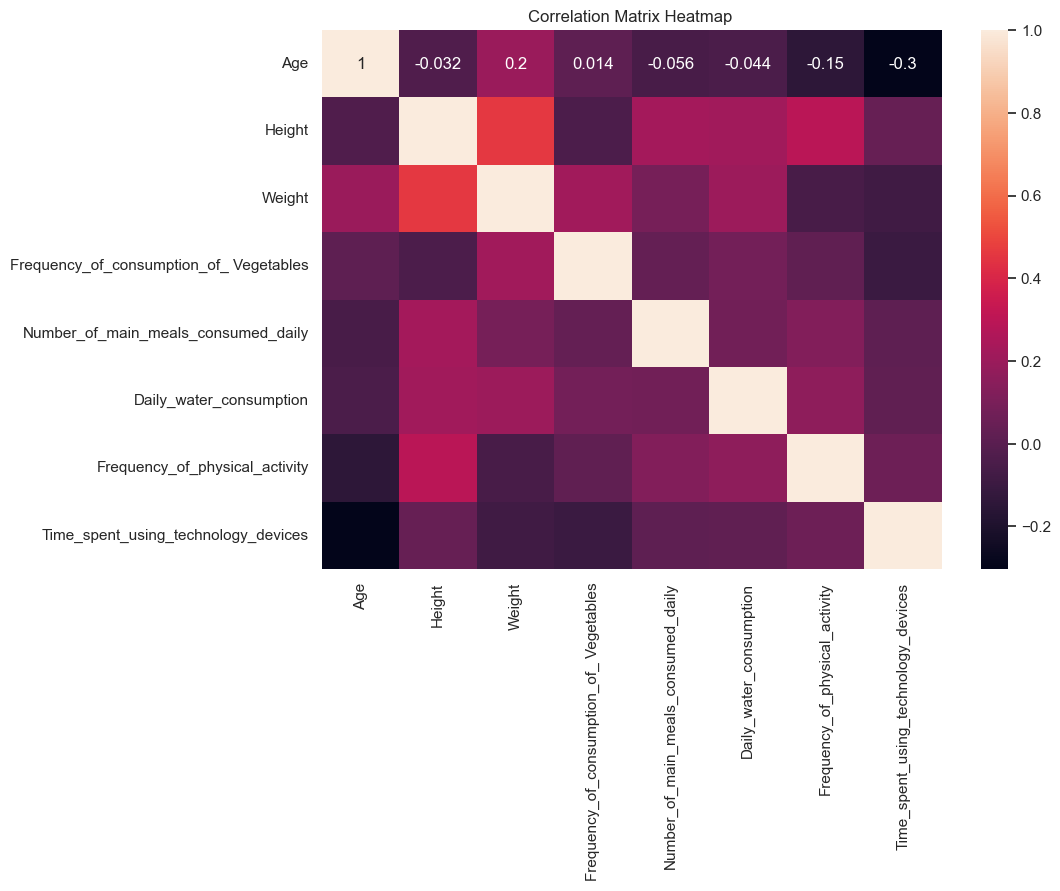

In [ ]:
correlation_matrix = data_.corr(numeric_only=True)
# setting the size of the plot
fig=plt.figure(figsize=(10,7))
# Plotting the correlation matrix and displaying it
sb.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Heatmap ')
plt.savefig('heatmap.jpg', dpi=500)
plt.show()

In [ ]:
correlation_matrix

Age    Height    Weight  \
Age                                      1.000000 -0.025958  0.202560   
Height                                  -0.025958  1.000000  0.463136   
Weight                                   0.202560  0.463136  1.000000   
Frequency_of_consumption_of_ Vegetables  0.016291 -0.038121  0.216125   
Number_of_main_meals_consumed_daily     -0.043944  0.243672  0.107469   
Daily_water_consumption                 -0.045304  0.213376  0.200575   
Frequency_of_physical_activity          -0.144938  0.294709 -0.051436   
Time_spent_using_technology_devices     -0.296931  0.051912 -0.071561   

                                         Frequency_of_consumption_of_ Vegetables  \
Age                                                                     0.016291   
Height                                                                 -0.038121   
Weight                                                                  0.216125   
Frequency_of_consumption_of_ Vegetables                                 1.000000   
Number_of_main_meals_consumed_daily                                     0.042216   
Daily_water_consumption                                                 0.068461   
Frequency_of_physical_activity                                          0.019939   
Time_spent_using_technology_devices                                    -0.101135   

                                         Number_of_main_meals_consumed_daily  \
Age                                                                -0.043944   
Height                                                              0.243672   
Weight                                                              0.107469   
Frequency_of_consumption_of_ Vegetables                             0.042216   
Number_of_main_meals_consumed_daily                                 1.000000   
Daily_water_consumption                                             0.057088   
Frequency_of_physical_activity                                      0.129504   
Time_spent_using_technology_devices                                 0.036326   

                                         Daily_water_consumption  \
Age                                                    -0.045304   
Height                                                  0.213376   
Weight                                                  0.200575   
Frequency_of_consumption_of_ Vegetables                 0.068461   
Number_of_main_meals_consumed_daily                     0.057088   
Daily_water_consumption                                 1.000000   
Frequency_of_physical_activity                          0.167236   
Time_spent_using_technology_devices                     0.011965   

                                         Frequency_of_physical_activity  \
Age                                                           -0.144938   
Height                                                         0.294709   
Weight                                                        -0.051436   
Frequency_of_consumption_of_ Vegetables                        0.019939   
Number_of_main_meals_consumed_daily                            0.129504   
Daily_water_consumption                                        0.167236   
Frequency_of_physical_activity                                 1.000000   
Time_spent_using_technology_devices                            0.058562   

                                         Time_spent_using_technology_devices  
Age                                                                -0.296931  
Height                                                              0.051912  
Weight                                                             -0.071561  
Frequency_of_consumption_of_ Vegetables                            -0.101135  
Number_of_main_meals_consumed_daily                                 0.036326  
Daily_water_consumption                                             0.011965  
Frequency_of_physical_activity                                      

In [ ]:
col_train

['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'Frequently_Consumed_High_Calorie_foods',
 'Frequency_of_consumption_of_ Vegetables',
 'Number_of_main_meals_consumed_daily',
 'Food_consumption_between_meals',
 'SMOKE',
 'Daily_water_consumption',
 'Monitoring_calorie_intake',
 'Frequency_of_physical_activity',
 'Time_spent_using_technology_devices',
 'Alcohol_consumption_daily',
 'Mode_of_transportation_used']

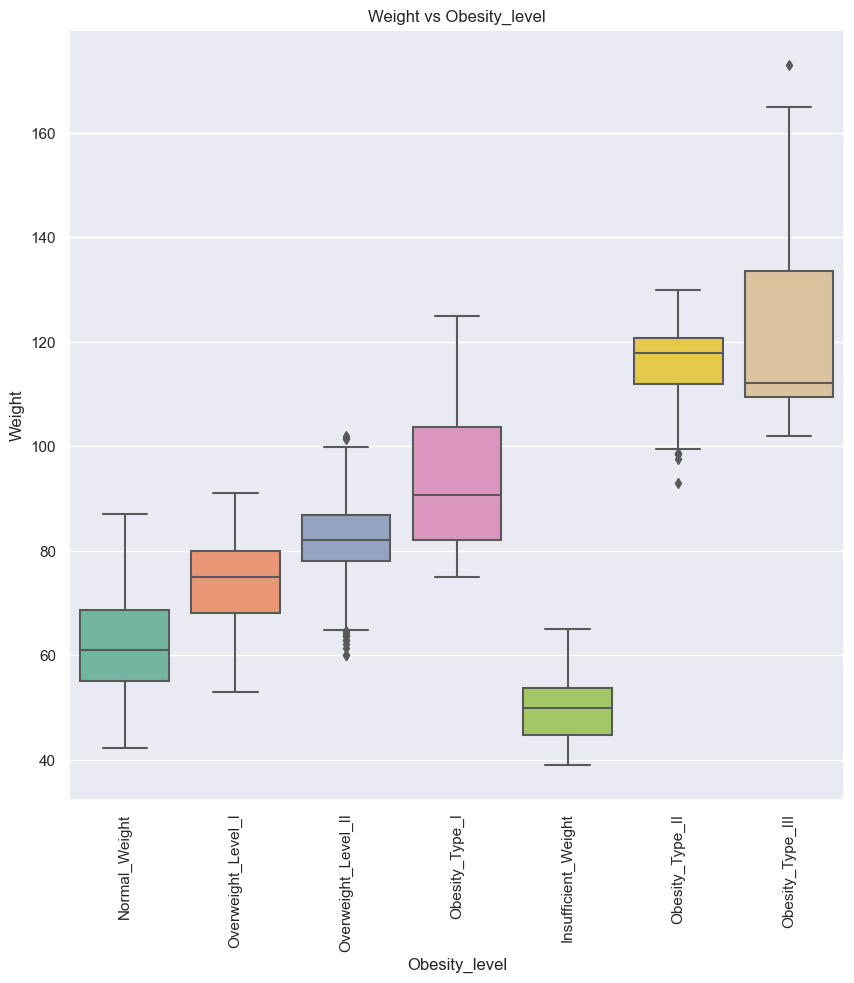

In [ ]:
# Plotting Weight vs Obesity_level
plt.figure(figsize=(10,10))

comp=sb.boxplot(data_, y='Weight', x='Obesity_level', palette='Set2')
comp.set_xticklabels(labels=list(data_['Obesity_level'].unique()), rotation=90)
plt.title('Weight vs Obesity_level')
plt.savefig('Weight vs obesity level.jpg', dpi=500)
plt.show()

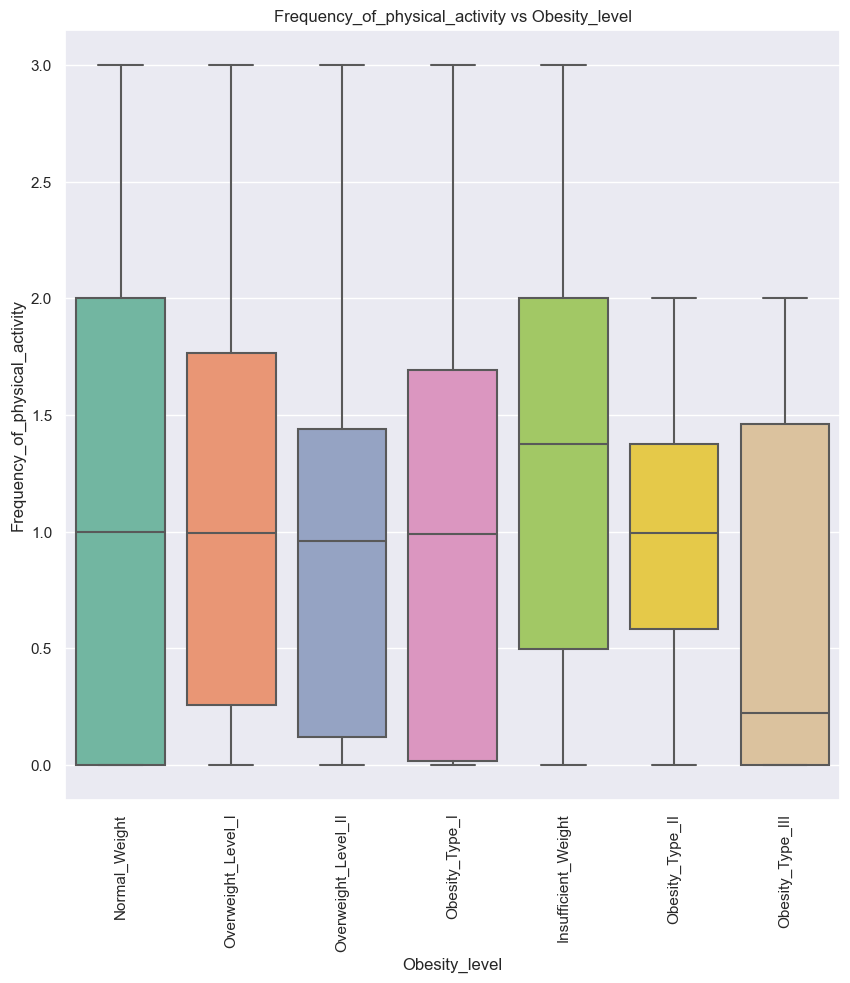

In [ ]:
# Plotting Frequency_of_physical_activity vs Obesity_level
plt.figure(figsize=(10,10))
act=sb.boxplot(data_, y='Frequency_of_physical_activity', x='Obesity_level', palette='Set2')
act.set_xticklabels(labels=list(data_['Obesity_level'].unique()), rotation=90)
plt.title('Frequency_of_physical_activity vs Obesity_level')
plt.savefig('physical_activity.jpg', dpi=500)
plt.show()

In [ ]:
len(data_.columns)

17

In [ ]:
# Creating a list of numerical variables in data_
data_col=['Age', 'Height', 'Weight', 'Frequency_of_consumption_of_ Vegetables', 'Number_of_main_meals_consumed_daily',
          'Daily_water_consumption', 'Frequency_of_physical_activity', 'Time_spent_using_technology_devices']
data_col

['Age',
 'Height',
 'Weight',
 'Frequency_of_consumption_of_ Vegetables',
 'Number_of_main_meals_consumed_daily',
 'Daily_water_consumption',
 'Frequency_of_physical_activity',
 'Time_spent_using_technology_devices']

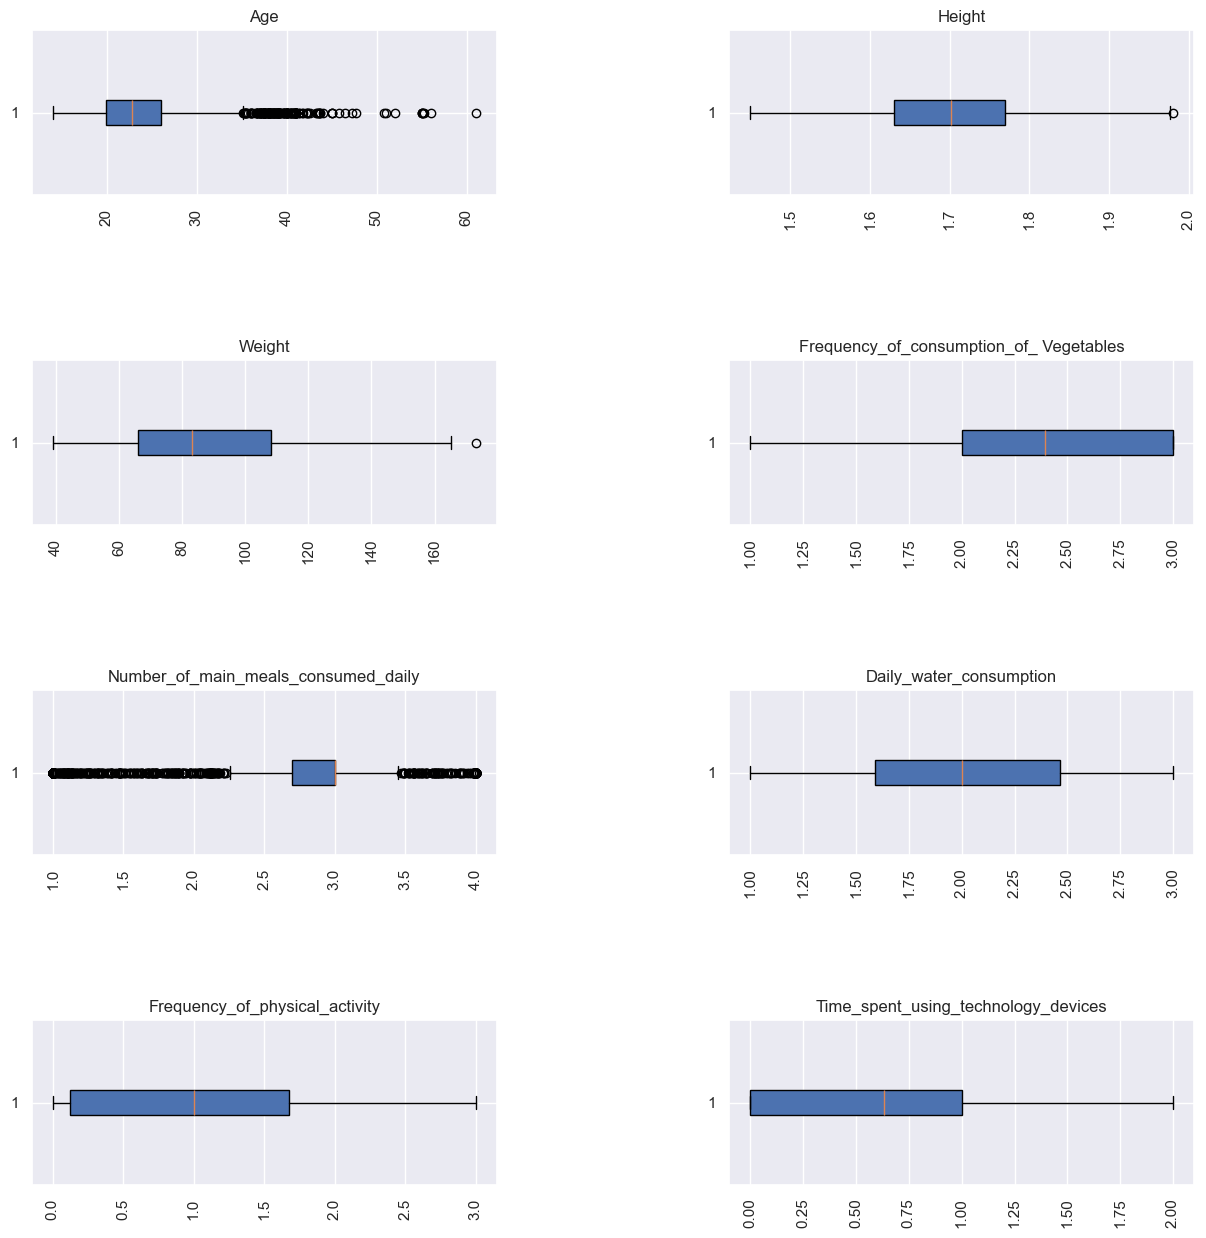

In [ ]:
# Plotting Boxplots for the numerical variables
plt.figure(figsize=(15,15))
for i in range(len(data_col)):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace=1, wspace=0.5)
    plt.title(data_col[i])
    plt.boxplot(data_[data_col[i]], vert=False, patch_artist=True )
    plt.xticks(rotation=90)
    plt.savefig('Boxplots.jpg', dpi=500)
plt.show()
#plt.savefig('Boxplots.jpg', dpi=300)

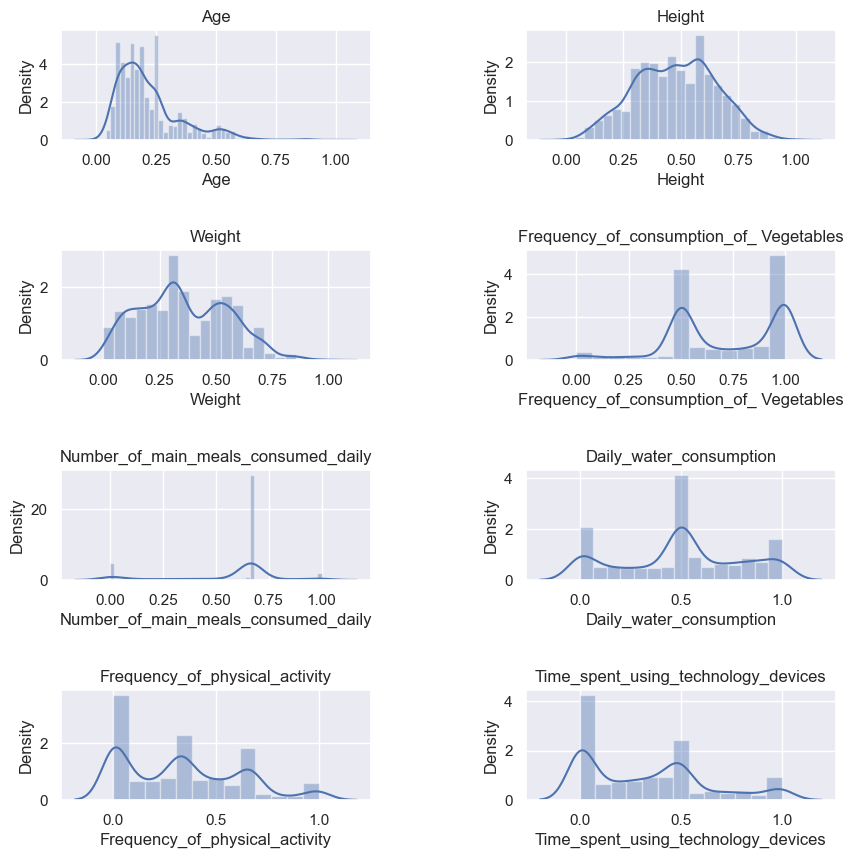

In [ ]:
# Plotting KDE and distribution plots for the numerical variables
plt.figure(figsize=(10,10))

for i in range(len(data_col)):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace=1, wspace=0.5)
    sb.distplot(obesity[data_col[i]], kde=True)
    plt.title(data_col[i])
    plt.savefig('KDE.jpg', dpi=500)
plt.show()

<Figure size 3000x3000 with 0 Axes>

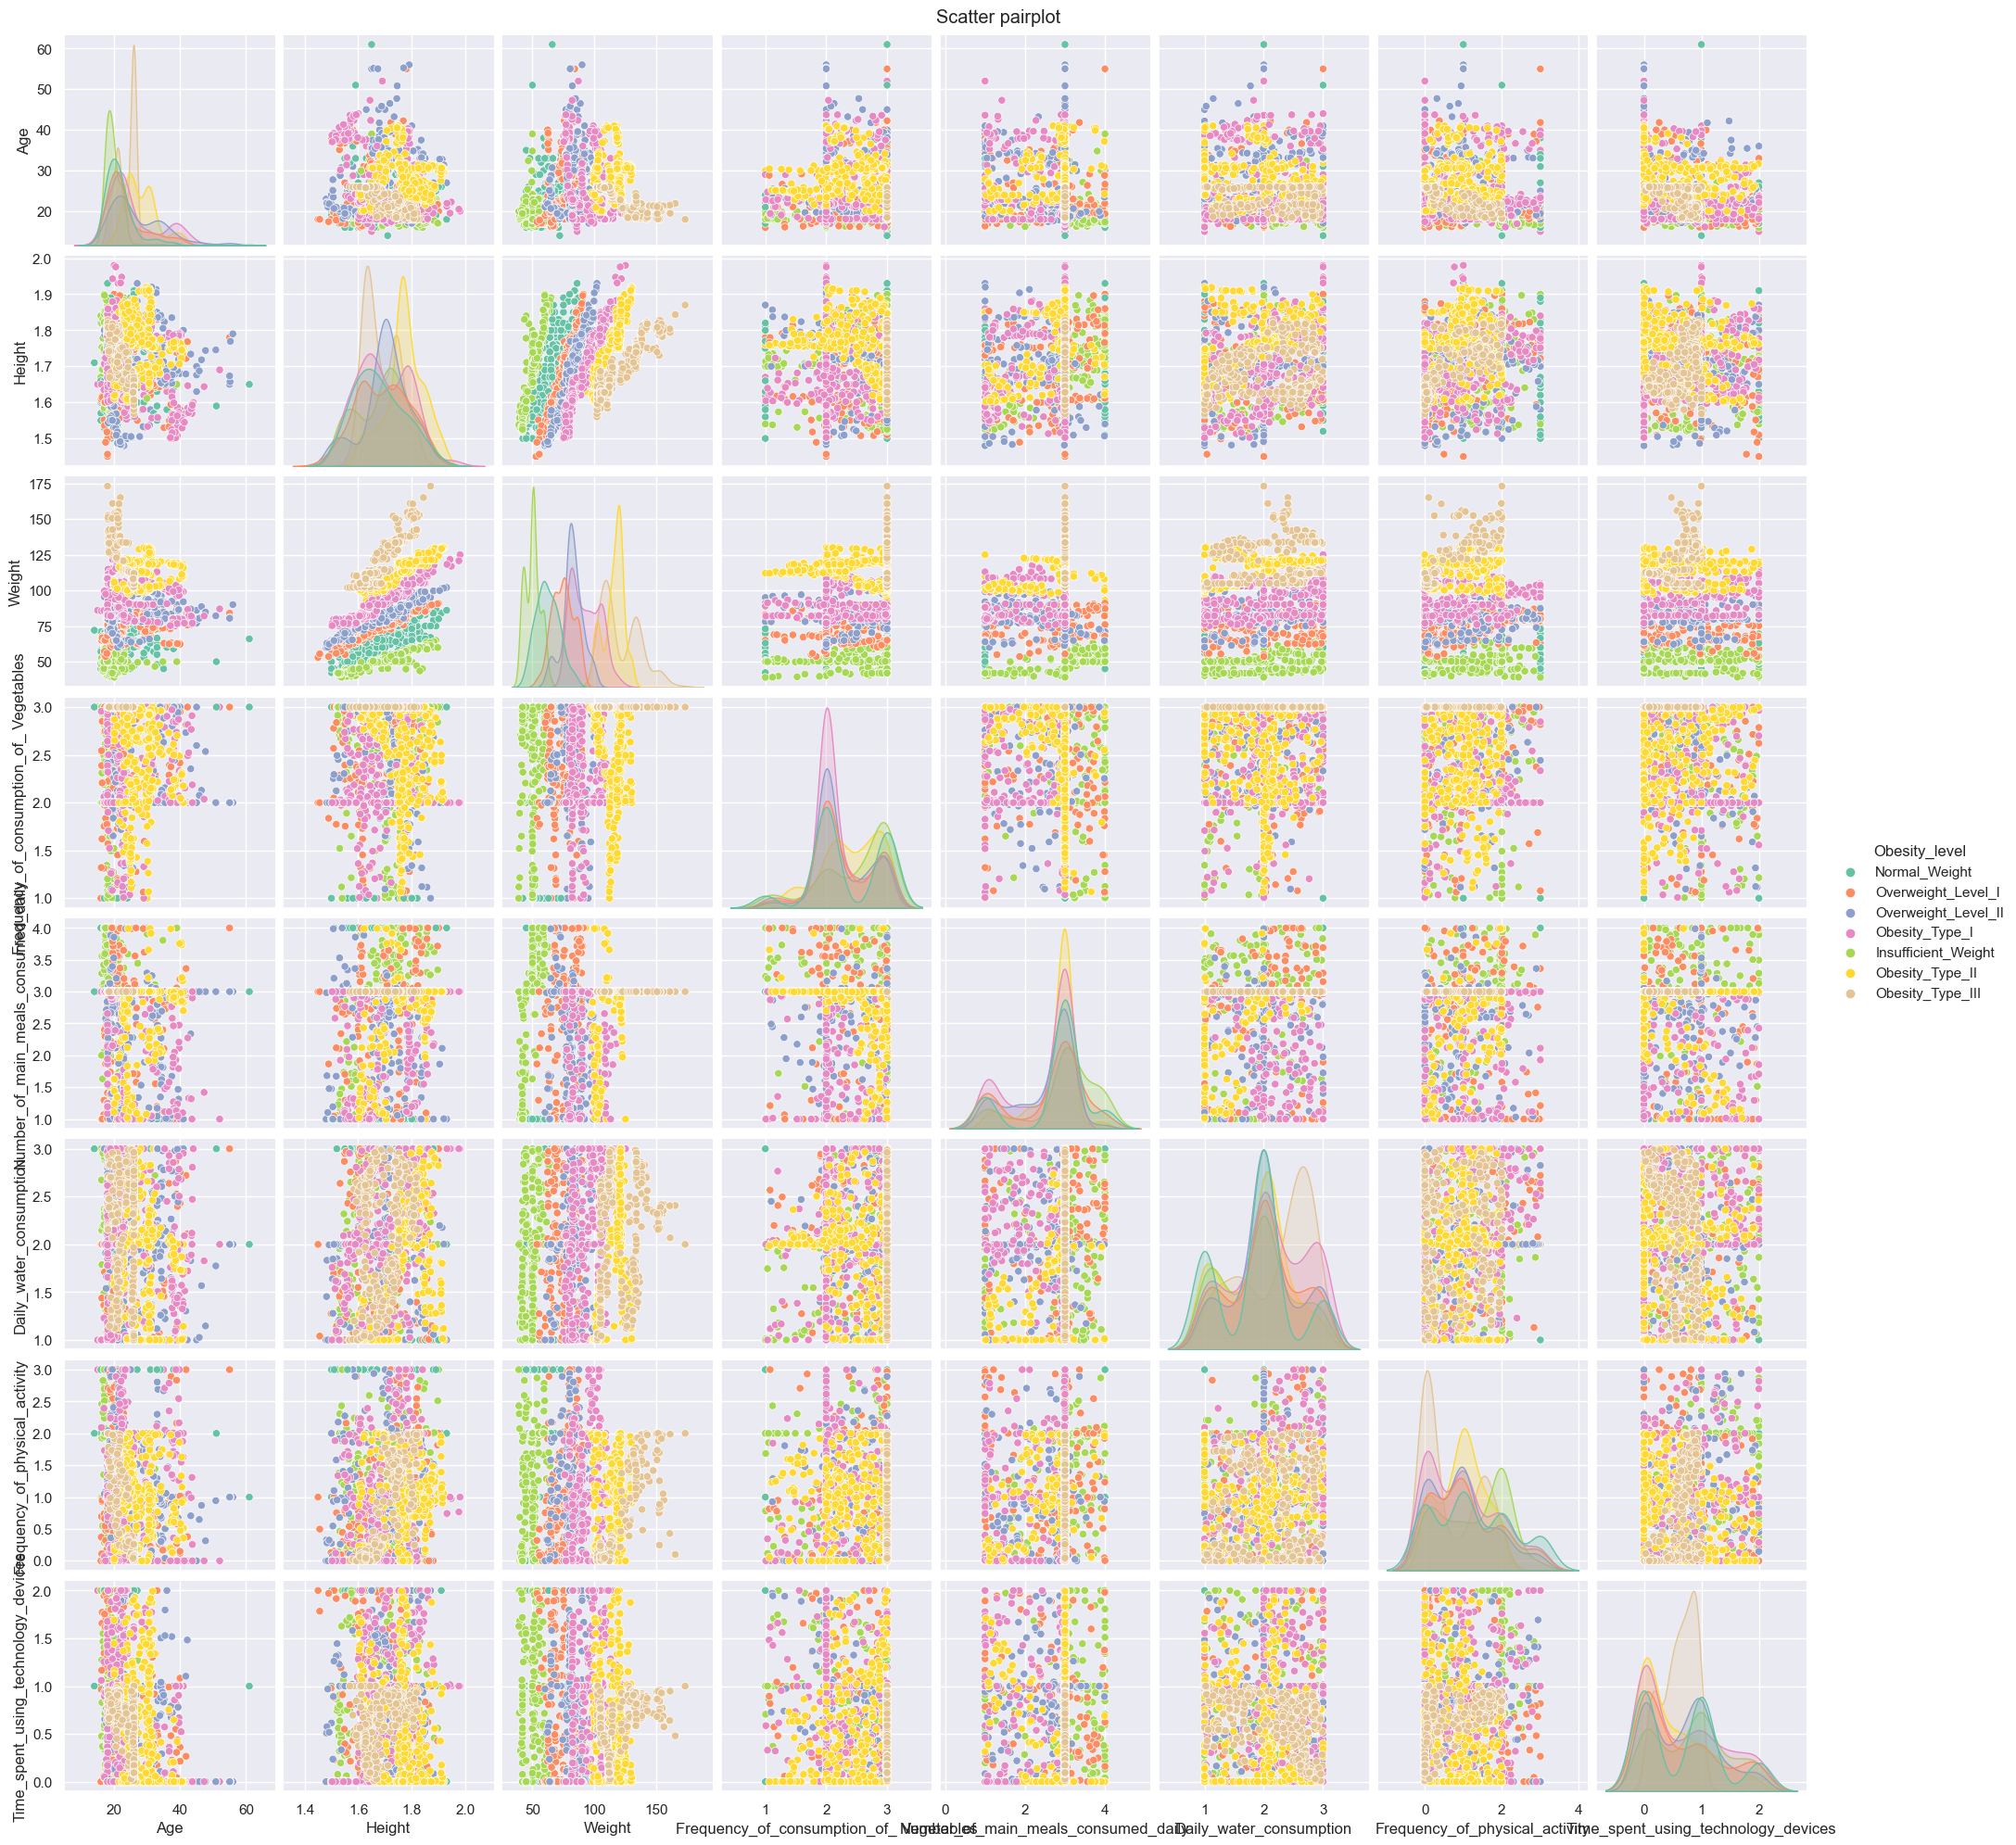

In [ ]:
# Pairplots
fig=plt.figure(figsize=(30,30))

scatter=sb.pairplot(data_, hue='Obesity_level', kind='scatter', palette='Set2')
scatter.fig.suptitle('Scatter pairplot', y=1)
plt.savefig('Pairplot.jpg', dpi=500)
plt.show()

                                    Feature  Gini Importance
3                                    Weight         0.488943
1                                       Age         0.083843
2                                    Height         0.073200
7       Number_of_main_meals_consumed_daily         0.068685
4            family_history_with_overweight         0.050129
8            Food_consumption_between_meals         0.046463
12           Frequency_of_physical_activity         0.036930
13      Time_spent_using_technology_devices         0.035073
6   Frequency_of_consumption_of_ Vegetables         0.030589
10                  Daily_water_consumption         0.026420
0                                    Gender         0.017207
15              Mode_of_transportation_used         0.016617
14                Alcohol_consumption_daily         0.016282
5    Frequently_Consumed_High_Calorie_foods         0.005957
11                Monitoring_calorie_intake         0.002994
9                       

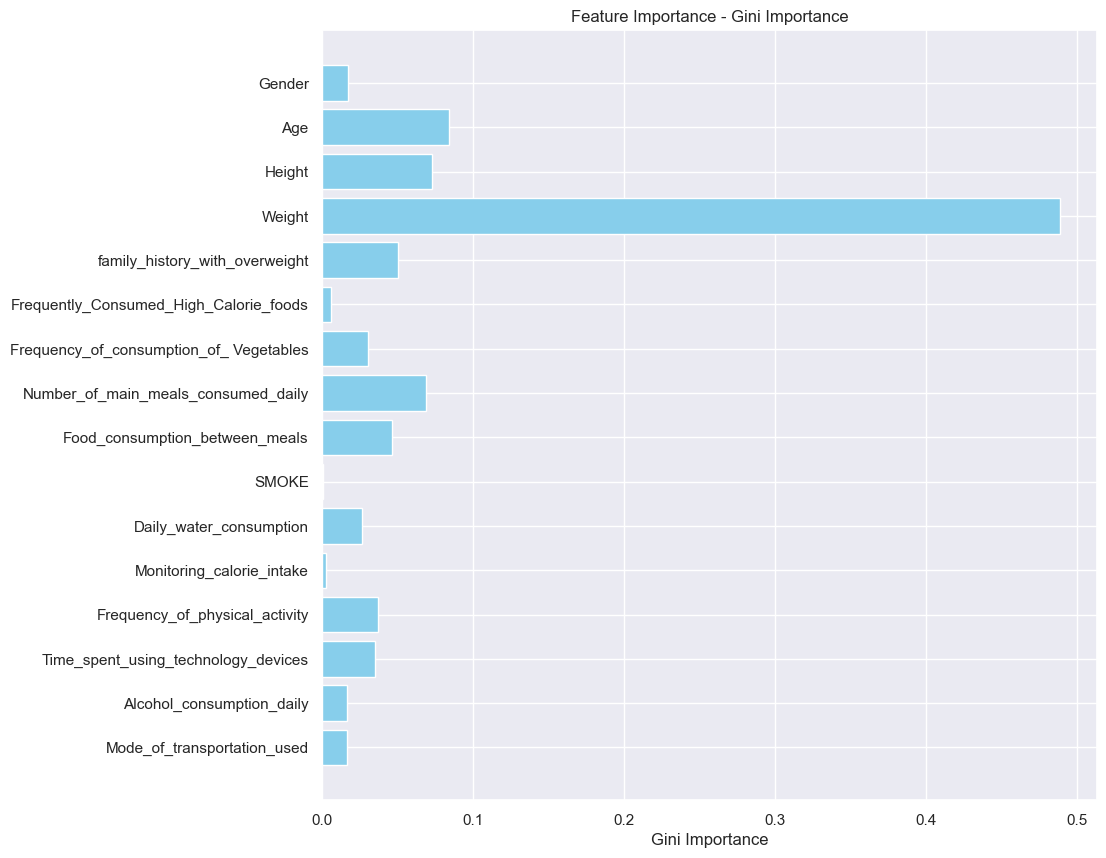

In [ ]:
# Feature importance plots
Feature_imp=random.feature_importances_
feature_imp_df=pd.DataFrame({'Feature':col_train, 'Gini Importance':Feature_imp}).sort_values('Gini Importance', ascending=False)
print(feature_imp_df)

plt.figure(figsize=(10,10))
plt.barh(col_train, Feature_imp, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()
plt.savefig('Feature Importance.jpg', dpi=500)
plt.show()